In [1]:
# necessary libraries
import os
import pandas as pd

# visualizations libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
%matplotlib inline

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# model evaluation libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

In [2]:
base_dir= "D:\FINALYR"
os.listdir(base_dir)

['0NORMAL', 'COVID19', 'PNEUMONIA', 'TURBERCULOSIS']

In [3]:
tuberculosis_data= r"D:\FINALYR\TURBERCULOSIS"
print("tuberculosis images :\n" ,os.listdir(tuberculosis_data)[:5])

normal_data= r"D:\FINALYR\0NORMAL"
print("\nnormal images :\n" ,os.listdir(normal_data)[:5])

covid_data= r"D:\FINALYR\COVID19"
print("\ncovid images :\n" ,os.listdir(covid_data)[:5])

pneumonia_data= r"D:\FINALYR\PNEUMONIA"
print("\npneumonia images :\n" ,os.listdir(pneumonia_data)[:5])

tuberculosis images :
 ['10.png', '100.png', '101.png', '102.png', '103.png']

normal images :
 ['IM-0001-0001.jpeg', 'IM-0003-0001.jpeg', 'IM-0005-0001.jpeg', 'IM-0006-0001.jpeg', 'IM-0007-0001.jpeg']

covid images :
 ['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg']

pneumonia images :
 ['person1000_bacteria_2931.jpeg', 'person1000_virus_1681.jpeg', 'person1001_bacteria_2932.jpeg', 'person1002_bacteria_2933.jpeg', 'person1003_bacteria_2934.jpeg']


In [4]:
print("no. of tuberculosis images :" ,len(os.listdir(tuberculosis_data)))
print("\nno. of normal images :" ,len(os.listdir(normal_data)))
print("\nno. of covid images :" ,len(os.listdir(covid_data)))
print("\nno. of pneumonia images :" ,len(os.listdir(pneumonia_data)))

no. of tuberculosis images : 2000

no. of normal images : 2000

no. of covid images : 2000

no. of pneumonia images : 2000


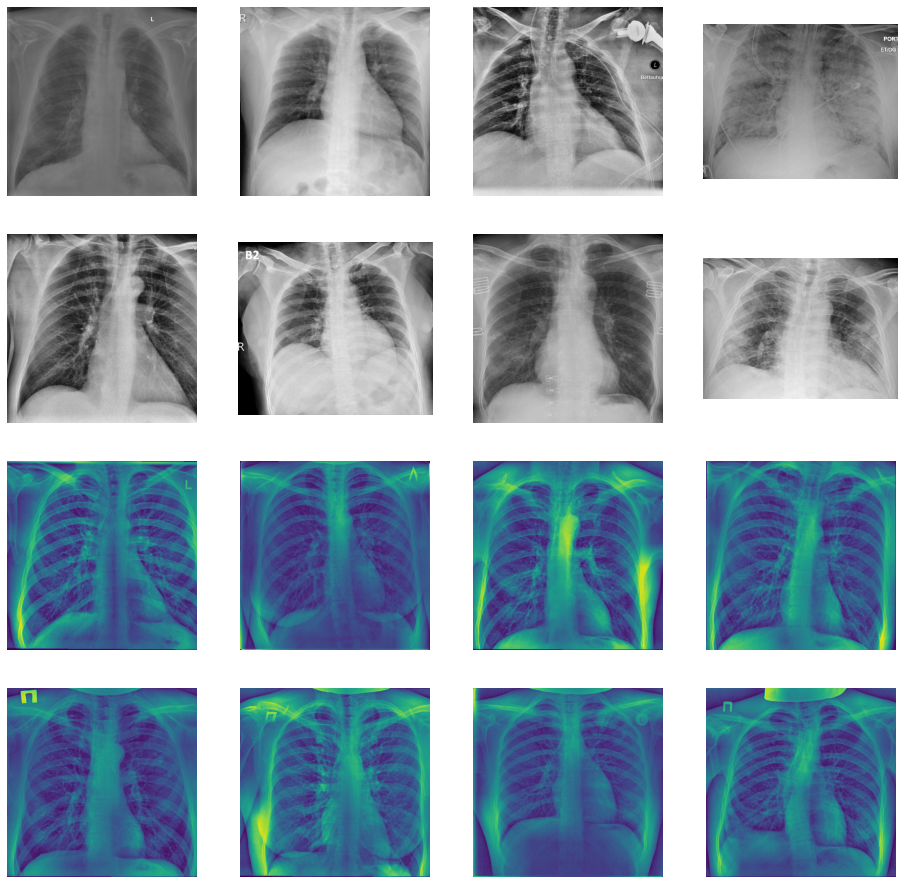

In [5]:
nrows= 4
ncols= 4
pic_index= 0

fig= plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8

tuberculosis_img = [os.path.join(tuberculosis_data, image) for image in os.listdir(tuberculosis_data)[pic_index-8:pic_index]]
normal_img = [os.path.join(normal_data, image) for image in os.listdir(normal_data)[pic_index-8:pic_index]]
covid_img = [os.path.join(covid_data, image) for image in os.listdir(covid_data)[pic_index-8:pic_index]]
pneumonia_img = [os.path.join(pneumonia_data, image) for image in os.listdir(pneumonia_data)[pic_index-8:pic_index]]

for i, image_path in enumerate(covid_img+tuberculosis_img):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') 

    img = mpimg.imread(image_path)
    plt.imshow(img)

plt.show()

In [11]:
test_dir= "D:\Fy"
# generating training data
print("training data :")
train_datagen= ImageDataGenerator(rescale=1/255, zoom_range=0.3, rotation_range=50, width_shift_range= 0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest', validation_split = 0.2)

train_data = train_datagen.flow_from_directory(base_dir, 
                                              target_size= (96, 96),
                                              class_mode= "categorical",
                                              batch_size=20,
                                              subset= "training"
                                              )

# genarating validation data
print("\nvalidation data :")
val_datagen= ImageDataGenerator(rescale= 1/255, validation_split= 0.2)

val_data= train_datagen.flow_from_directory(base_dir, 
                                              target_size= (96, 96),
                                              class_mode= "categorical",
                                              batch_size=20,
                                              shuffle= False,
                                              subset= "validation"
                                              )

print("\ntest data :")
test_datagen=ImageDataGenerator(rescale=1/255, zoom_range=0.3, rotation_range=50, width_shift_range= 0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest',validation_split = 0.999999999)
test_data= test_datagen.flow_from_directory(test_dir, 
                                              target_size= (96, 96),
                                              class_mode= "categorical",
                                              batch_size=20,
                                              shuffle= False,
                                              subset= "validation"
                                              )

training data :
Found 6400 images belonging to 4 classes.

validation data :
Found 1600 images belonging to 4 classes.

test data :
Found 796 images belonging to 4 classes.


In [7]:
train_data.class_indices

{'0NORMAL': 0, 'COVID19': 1, 'PNEUMONIA': 2, 'TURBERCULOSIS': 3}

In [12]:
from keras.applications import xception

base_model = xception.Xception(weights='imagenet',include_top=False,input_shape=(96,96, 3),pooling='avg')

In [13]:
top_model = Sequential()

top_model.add(Dense(256, activation='relu', input_shape=base_model.output_shape[1:]))
top_model.add(Dropout(0.5))

top_model.add(Dense(128, activation='relu'))
top_model.add(Dropout(0.5))

top_model.add(Dense(4, activation='softmax'))
model = Model(inputs=base_model.input, outputs=top_model(base_model.output))

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history= model.fit(train_data,
                   steps_per_epoch= train_data.samples//train_data.batch_size,
                   validation_data= val_data,
                   validation_steps= val_data.samples//val_data.batch_size,
                   epochs= 10,
                   verbose=1 
                  )

Epoch 1/10
320/320 [==============================] - 331s 1s/step - loss: 1.2370 - accuracy: 0.4231 - val_loss: 1.2079 - val_accuracy: 0.3587
Epoch 2/10
320/320 [==============================] - 329s 1s/step - loss: 1.0734 - accuracy: 0.5098 - val_loss: 1.0559 - val_accuracy: 0.4512
Epoch 3/10
320/320 [==============================] - 329s 1s/step - loss: 1.0183 - accuracy: 0.5533 - val_loss: 0.9854 - val_accuracy: 0.5369
Epoch 4/10
320/320 [==============================] - 328s 1s/step - loss: 0.8993 - accuracy: 0.6203 - val_loss: 0.8834 - val_accuracy: 0.6606
Epoch 5/10
320/320 [==============================] - 330s 1s/step - loss: 0.7670 - accuracy: 0.6752 - val_loss: 0.7915 - val_accuracy: 0.7231
Epoch 6/10
320/320 [==============================] - 330s 1s/step - loss: 0.6703 - accuracy: 0.7147 - val_loss: 0.7336 - val_accuracy: 0.7669
Epoch 7/10
320/320 [==============================] - 331s 1s/step - loss: 0.5982 - accuracy: 0.7358 - val_loss: 0.8381 - val_accuracy: 0.7450

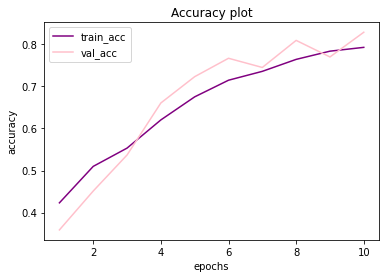

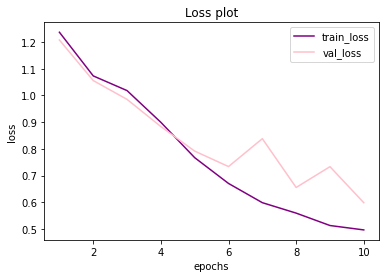

In [15]:
epochs= range(1, len(history.history["accuracy"])+1)

plt.plot(epochs, history.history["accuracy"], color="purple")
plt.plot(epochs, history.history["val_accuracy"], color="pink")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc", "val_acc"])
plt.show()

plt.plot(epochs, history.history["loss"], color="purple")
plt.plot(epochs, history.history["val_loss"], color="pink")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss", "val_loss"])
plt.show()

In [22]:
import numpy as np
prediction= model.predict(test_data, steps=np.ceil(test_data.samples/test_data.batch_size), verbose=1)

40/40 [==============================] - 15s 369ms/step


In [23]:
prediction

array([[6.52790666e-02, 4.08885419e-01, 5.25257409e-01, 5.78104169e-04],
       [8.27409863e-01, 5.63928150e-02, 1.09169416e-01, 7.02791056e-03],
       [9.99498963e-01, 8.97791688e-05, 4.11099521e-04, 2.15926207e-07],
       ...,
       [2.35942588e-03, 2.32727006e-02, 7.11713079e-03, 9.67250645e-01],
       [2.39910907e-03, 2.58455947e-02, 7.28392415e-03, 9.64471459e-01],
       [2.38206494e-03, 2.66009215e-02, 7.36295618e-03, 9.63654101e-01]],
      dtype=float32)

In [24]:
x=np.argmax(prediction, axis=1)

In [25]:
x

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0,
       3, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0,
       0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 2, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1,

In [26]:
test_labels=test_data.classes
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [27]:
from sklearn.metrics import classification_report
print(classification_report(x, test_labels))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82       160
           1       0.88      0.97      0.93       181
           2       0.92      0.77      0.84       239
           3       0.99      0.91      0.95       216

    accuracy                           0.88       796
   macro avg       0.88      0.89      0.88       796
weighted avg       0.90      0.88      0.89       796

